# RandomWalk

## Model of a random walk

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML  # for embedded matplotlib animation

import inspect  #This allows us to print the source code in this notebook.
from RandomWalk import *  #Import the custom function from this project.

n = 50  # number of steps
data = np.array(RandomWalk(n))

### Graph

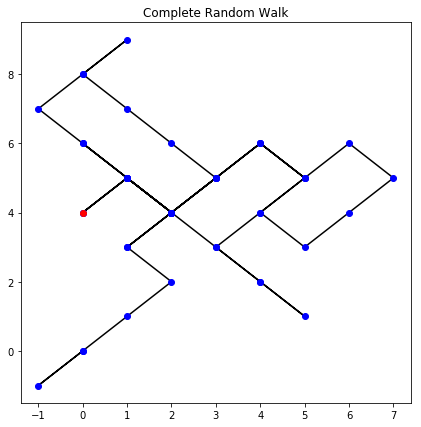

In [ ]:
fsx=7                 #Width (in inches) for the figures.
fsy=fsx               #Height (in inches) for the figures.

plt.figure(figsize=(fsx, fsy))
plt.plot(data[0], data[1], 'k-')
plt.plot(data[0], data[1], 'bo')
plt.plot([data[0,-1]], [data[1,-1]], 'ro')
plt.title('Complete Random Walk')
plt.show()

### Animation

In [ ]:
def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

In [ ]:
## Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

fig1 = plt.figure()

l, = plt.plot([], [], 'r-')

# Set figure size so that complete walk displays
plt.xlim(min(data[0]) - 1, max(data[0]) + 1)
plt.ylim(min(data[1]) - 1, max(data[1]) + 1)
plt.title('Random Walk Animation')
# one more point (n + 1) than steps, n
line_ani = animation.FuncAnimation(fig1, update_line, n + 1, fargs=(data, l), 
                                   interval=50, blit=False)


# To save the animation, use the command, placed before HTML: 
line_ani.save('RandomWalk.mp4', writer=writer)

HTML(line_ani.to_html5_video())

### Display RandomWalk.py

In [ ]:
print(inspect.getsource(RandomWalk))

def RandomWalk(n):

    # determine points of path
    x = x0 = 0
    y = y0 = 0
    xLst = [0] 
    yLst = [0] 
    lst = [[0, 0]]
    for i in range(n):
        if randrange(2) == 0:
            x = x + 1
        else:
            x = x - 1
            
        if randrange(2) == 0:
            y = y + 1
        else:
            y = y - 1

        xLst.append(x)
        yLst.append(y)
        lst.append([x, y])
        
    return [xLst, yLst]



## Average distance between first and last points of 100 random walks, where steps are made on the diagonal

In [ ]:
from RandomWalkAvg import *  #Import the custom function from this project.
RandomWalkAvg(50)

6.1949477677923435

In [ ]:
print(inspect.getsource(RandomWalkAvg))

def RandomWalkAvg(n):
    # determine points of path
    numTests = 100  # number of runs
    x0 = 0
    y0 = 0
    n = 25  # number of steps
    sumDist = 0   # sum of distances
    for j in range(numTests):
        x = x0
        y = y0
        for i in range(n):
            if randrange(2) == 0:
                x = x + 1
            else:
                x = x - 1
                
            if randrange(2) == 0:
                y = y + 1
            else:
                y = y - 1
        sumDist = sumDist + sqrt((x - x0)**2 + (y - y0)**2)

    return sumDist/numTests



## Average distances traveled in 100 random walks of n steps, where n varies from 1 to 50

In [ ]:
from RandomWalkAvgManyTimes import *  #Import the custom function from this project.
data = np.array(RandomWalkAvgManyTimes())

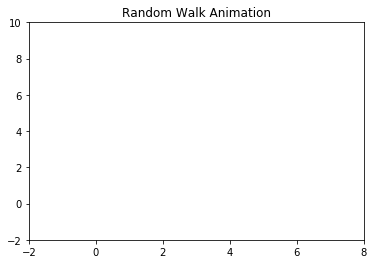

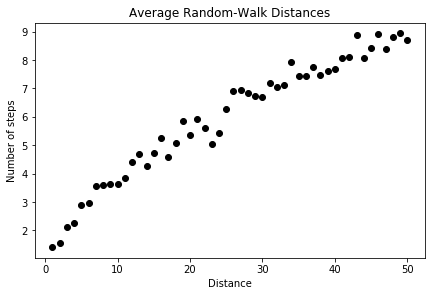

In [ ]:
goldenratio=1/2*(1+sqrt(5))
fsx=7                 #Width (in inches) for the figures.
fsy=fsx/goldenratio   #Height (in inches) for the figures.

plt.figure(figsize=(fsx, fsy))
plt.plot(range(1, 51), data, 'ko')
plt.xlabel('Distance')
plt.ylabel('Number of steps')
plt.title('Average Random-Walk Distances')
plt.show()

In [ ]:
print(inspect.getsource(RandomWalkAvgManyTimes))

def RandomWalkAvgManyTimes():
    # determine points of path
    numTests = 100  # number of runs
    x0 = 0
    y0 = 0
    listDist = []  # list of distances
    for n in range(1, 51):
        sumDist = 0    # sum of distances
        for j in range(numTests):
            x = x0
            y = y0
            for i in range(n):
                if randrange(2) == 0:
                    x = x + 1
                else:
                    x = x - 1
                    
                if randrange(2) == 0:
                    y = y + 1
                else:
                    y = y - 1
            sumDist = sumDist + sqrt((x - x0)**2 + (y - y0)**2)

        listDist.append(sumDist/numTests)

    return listDist

